In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
cleaned_train_review = pd.read_csv('caches/cleaned_train_reviews_wordlist_nostopwords.csv', header=0, quoting=3)

In [4]:
vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)

In [5]:
train_set_features = vectorizer.fit_transform(cleaned_train_review['review']).toarray()

In [6]:
train_set_features.shape

(25000, 5000)

In [7]:
vocab = vectorizer.get_feature_names()
vocab[:20]

['abandoned',
 'abc',
 'abilities',
 'ability',
 'able',
 'abraham',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absurd',
 'abuse',
 'abusive',
 'abysmal',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepted']

In [8]:
import numpy as np

In [9]:
dist = np.sum(train_set_features, axis=0)

In [10]:
for tag, count in list(zip(vocab, dist))[:20]:
    print(tag, count)

abandoned 187
abc 125
abilities 108
ability 454
able 1259
abraham 85
absence 116
absent 83
absolute 352
absolutely 1485
absurd 306
abuse 192
abusive 91
abysmal 98
academy 297
accent 485
accents 203
accept 300
acceptable 130
accepted 144


In [30]:
train_X, test_X, train_y, test_y = train_test_split(train_set_features, cleaned_train_review['sentiment'], test_size=0.2)

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100)

In [32]:
rf_classifier.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [33]:
predicted_result = rf_classifier.predict(test_X)

In [34]:
predicted_result[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [35]:
test_y.values[:10]

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
fpr, tpr, _ = roc_curve(test_y, predicted_result)

In [38]:
roc_auc = auc(fpr, tpr)

In [39]:
roc_auc

0.84319254715628644

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

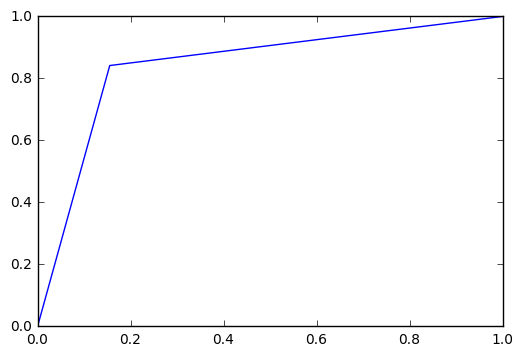

In [41]:
plt.plot(fpr, tpr)
plt.show()